In [34]:
import torch
from torch import optim,nn
from torchvision import datasets,transforms as T,models
import torch.nn.functional as F
from torch.utils.data import DataLoader
import hiddenlayer as hl
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary 

In [31]:
train_dir = 'data/train'
valid_dir = 'data/val'
test_dir = 'data/test'

10

In [10]:
train_transform = T.Compose([
    T.Resize((320,320)),
    T.RandomRotation(0,359),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

valid_transform = T.Compose([
    
    T.Resize((320,320)),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    
])

test_transform = valid_transform

In [12]:
trainset = datasets.ImageFolder(train_dir,transform = train_transform)

validset = datasets.ImageFolder(valid_dir,transform = valid_transform)

testset = datasets.ImageFolder(test_dir,transform = test_transform)

In [15]:
Trainloader = DataLoader(trainset, batch_size = 64, shuffle = True)
Validloader = DataLoader(validset, batch_size = 64, shuffle = True)
Testloader = DataLoader(testset, batch_size = 64, shuffle = True)

In [17]:
def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    plt.imshow(image) 

classes = ['NORMAL','PNEUMONIA']

In [19]:
dataiter = iter(Trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 320, 320])
torch.Size([64])


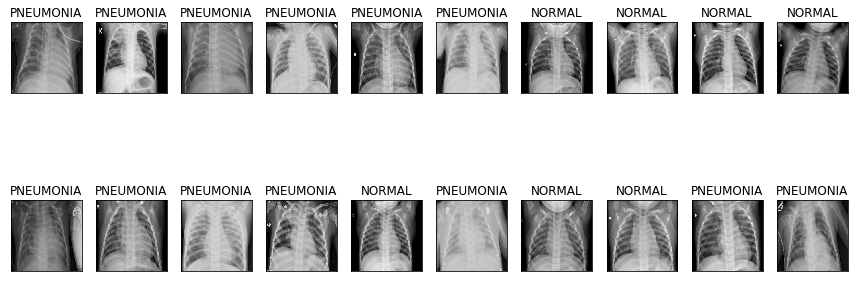

In [30]:
fig = plt.figure(figsize=(15, 6))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [53]:
model = models.inception_v3(pretrained=True)

In [54]:
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict

fc = nn.Sequential(OrderedDict([
    ('fc1',nn.Linear(2048,1024)),
    ('relu',nn.ReLU()),
    ('dropout',nn.Dropout(0.5)),
    ('fc2',nn.Linear(1024,500)),
    ('relu',nn.ReLU()),
    ('dropout',nn.Dropout(0.5)),
    ('fc3',nn.Linear(500,2)),
    ('output',nn.LogSoftmax(dim = 1))
]))

model.fc = fc
model.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [55]:
summary(model,input_size=(3,320,320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 159, 159]             864
       BatchNorm2d-2         [-1, 32, 159, 159]              64
       BasicConv2d-3         [-1, 32, 159, 159]               0
            Conv2d-4         [-1, 32, 157, 157]           9,216
       BatchNorm2d-5         [-1, 32, 157, 157]              64
       BasicConv2d-6         [-1, 32, 157, 157]               0
            Conv2d-7         [-1, 64, 157, 157]          18,432
       BatchNorm2d-8         [-1, 64, 157, 157]             128
       BasicConv2d-9         [-1, 64, 157, 157]               0
        MaxPool2d-10           [-1, 64, 78, 78]               0
           Conv2d-11           [-1, 80, 78, 78]           5,120
      BatchNorm2d-12           [-1, 80, 78, 78]             160
      BasicConv2d-13           [-1, 80, 78, 78]               0
           Conv2d-14          [-1, 192,

     BasicConv2d-195          [-1, 192, 18, 18]               0
          Conv2d-196          [-1, 192, 18, 18]         258,048
     BatchNorm2d-197          [-1, 192, 18, 18]             384
     BasicConv2d-198          [-1, 192, 18, 18]               0
          Conv2d-199          [-1, 192, 18, 18]         258,048
     BatchNorm2d-200          [-1, 192, 18, 18]             384
     BasicConv2d-201          [-1, 192, 18, 18]               0
          Conv2d-202          [-1, 192, 18, 18]         147,456
     BatchNorm2d-203          [-1, 192, 18, 18]             384
     BasicConv2d-204          [-1, 192, 18, 18]               0
          Conv2d-205          [-1, 192, 18, 18]         258,048
     BatchNorm2d-206          [-1, 192, 18, 18]             384
     BasicConv2d-207          [-1, 192, 18, 18]               0
          Conv2d-208          [-1, 192, 18, 18]         258,048
     BatchNorm2d-209          [-1, 192, 18, 18]             384
     BasicConv2d-210          [-1, 192, 

In [62]:
epochs = 30 
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(),lr = 0.003)
print_every = 1

train_loss_data = []
val_loss_data = []

valid_loss_min = np.Inf

for i in range(epochs):

    train_loss = 0
    val_loss = 0
    train_run = 0

    model.train()
    batch_id = 0
    for images, labels in Trainloader:
        images = images.cuda()
        labels = labels.cuda()
        
        logps,aux = model(images)
        optimizer.zero_grad()
        loss = criterion(logps,labels)
        loss.backward()
        optimizer.step()
        
        train_run += loss.item()
        train_loss += loss.item()*images.size(0)

       
        
    
    model.eval()
    for images,labels in Validloader:
        
        images = images.cuda()
        labels = labels.cuda()

        logps = model(images)
        loss = criterion(logps,labels)
        val_loss += loss.item()*images.size(0)

     

    train_loss = train_loss/len(Trainloader.dataset)
    val_loss = val_loss/len(Validloader.dataset)
  

    train_loss_data.append(train_loss)
    val_loss_data.append(val_loss)
   

    print("Epoch : {} training Loss : {:.6f} Validation Loss : {:.6f} ".format(i+1,train_loss,val_loss))


    if val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).   Saving model ...'.format(valid_loss_min,val_loss))
        torch.save(model.state_dict(), 'PneumoniaModel.pt')
        valid_loss_min = val_loss

Epoch : 1 training Loss : 0.291994 Validation Loss : 0.466546 
Validation loss decreased (inf --> 0.466546).   Saving model ...
Epoch : 2 training Loss : 0.289887 Validation Loss : 0.517455 
Epoch : 3 training Loss : 0.284377 Validation Loss : 0.389258 
Validation loss decreased (0.466546 --> 0.389258).   Saving model ...
Epoch : 4 training Loss : 0.278782 Validation Loss : 0.569327 
Epoch : 5 training Loss : 0.271703 Validation Loss : 0.641408 
Epoch : 6 training Loss : 0.289648 Validation Loss : 0.405541 
Epoch : 7 training Loss : 0.275505 Validation Loss : 0.370131 
Validation loss decreased (0.389258 --> 0.370131).   Saving model ...
Epoch : 8 training Loss : 0.279605 Validation Loss : 0.324857 
Validation loss decreased (0.370131 --> 0.324857).   Saving model ...
Epoch : 9 training Loss : 0.276046 Validation Loss : 0.358801 
Epoch : 10 training Loss : 0.277475 Validation Loss : 0.374374 
Epoch : 11 training Loss : 0.280240 Validation Loss : 0.408091 
Epoch : 12 training Loss : 0.2